# Sales Report Analyst

Kali ini kita akan melakukan analists untuk sales report. Data yang diambil merupakan data dari kaggle. Berikut adalah beberapa keterangan dari kolom-kolom yang ada.
1. Date = Kolom Tanggal order
2. Year = Tahun order
3. Month = bulan order
4. Customer Age = Umur Customer
5. Customer Gender = Gender Customer
6. Country = Customer Country
7. State = Customer State
9. Product Category = Kategori produk yang dibeli
10. Sub Category = Sub  Katergori dari produk yang dibeli
11. Quantity = Banyaknya pembelian
12. Unit Cost = Biaya produksi per produk
13. Unit price = Harga jual per produk
14. Cost = Biaya Produksi sejumlah produk yang dibeli
15. Revenue = Pendapatan kotor

In [2]:
#Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load data sales
df = pd.read_csv('SalesForCourse_quizz_table.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
#Drop kolom yang tidak diperlukan
df.drop(['Column1'], axis=1, inplace = True)

In [5]:
#Cek kesesuaian tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB


In [6]:
#Cek missing value
df.isnull().sum()

index               0
Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

Dari data diatas diketahui terdapat 1 missing value pada beberapa kolom. Missing value ini tidak akan mempengaruhi hasil analisis dikarenakan jumlahnya yang sedikiti. Maka dari itu baris yang memiliki missing value ini akan kita hapus.

In [7]:
#Menghapus baris yang memiliki missing value
df = df.dropna()
# Cek apakah masih ada missing value
df.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [8]:
#Cek unique value kolom year
df['Year'].unique()

array([2016., 2015.])

In [9]:
#Cek Unique value kolom countery
df['Country'].value_counts()

United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: Country, dtype: int64

Transaksi pada data sales report ini berlangsung dari tahun 2015 sampai tahun 2016 dengan customer dari 4 negara yaitu United States, United Kingdom, Germany dan France. Sebagian Besar customer berasal dari United States.

In [10]:
#Cek unique Value kolom gender
df['Customer Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
#Cek unique value kolom state
df['State'].unique()

array(['Washington', 'California', 'Oregon', 'Essonne', 'Yveline',
       'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland',
       'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais',
       'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret',
       'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama',
       "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio',
       'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme',
       'New York', 'Florida', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana',
       'Arizona', 'Massachusetts', 'Utah'], dtype=object)

In [12]:
#Cek uniwue value kolom product category
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [13]:
#Cek unique value kolom customer age 
df['Customer Age'].unique()

array([29., 18., 19., 20., 22., 24., 40., 21., 23., 25., 30., 55., 53.,
       52., 51., 50., 49., 48., 47., 46., 45., 41., 42., 65., 64., 32.,
       33., 63., 34., 35., 43., 62., 37., 44., 60., 59., 58., 36., 61.,
       57., 54., 38., 39., 27., 28., 17., 26., 67., 66., 71., 31., 56.,
       87., 70., 69., 73., 68., 75., 86., 85., 77., 81., 84., 78., 72.,
       80., 74., 76., 79., 82.])

In [14]:
#Cek unique value kolom sub category
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

0. new column named profit
1. top product sub category that have most unit cost 
2. top product sub category by profit
3. top product sub category by quantity
4. male female pie chart profit and quantity
5. profit and quantity by country
6. costumer segmentation by age

### Membuat kolom baru bernama unit profit dan profit

Untuk mempermudah proses analisis perlu ditambahkan dua kolom baru yaitu unit profit dan profit. 
1. Unit profit merupakan keuntungan bersih yang didapatkan tiap pembelian 1 produk. Kolom ini dibuat dengan cara mengurangi nilai kolom unit price dengan kolom unit cost.
2. Profit merupakan kolom yang berisi keuntungan bersih yang didapatkan dari sejumlah barang yang dibeli. Kolom ini dibuat dengan cara mengurangi kolom revenue dengan kolom cost.

In [15]:
#Membuat kolom unit profit
df['Unit Profit'] = df['Unit Price'] - df['Unit Cost']
#Membuat kolom profit
df['Profit'] = df['Revenue'] - df['Cost']

In [16]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Profit,Profit
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.000000,29.0
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,4.000000,8.0
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,1.330000,4.0
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,29.000000,58.0
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,6.666667,20.0


## Top Product

In [48]:
#Membuat pivot table dengan index kolom sub category untuk mendapatkan top product dari segi profit, quantity, unit cost dan unit profit
top_Product = pd.pivot_table(df, index=['Sub Category'],
              aggfunc={
                  'Unit Cost':'mean',
                  'Unit Profit':'mean',
                  'Profit':'sum',
                  'Quantity':'sum'
              }).reset_index()
top_Product

,Sub Category,Profit,Quantity,Unit Cost,Unit Profit
0,Bike Racks,34894.0,204.0,666.796117,219.043689
1,Bike Stands,25301.0,304.0,511.358621,100.885057
2,Bottles and Cages,129567.0,10558.0,67.016591,14.927727
3,Caps,43610.0,3020.0,86.656889,17.494507
4,Cleaners,14664.0,1102.0,76.189046,16.263248
5,Fenders,71403.0,1494.0,216.060079,60.856807
6,Gloves,45817.0,913.0,239.738917,59.994069
7,Helmets,518475.0,8387.0,320.998211,74.602443
8,Hydration Packs,72341.0,786.0,513.402828,116.787407
9,Jerseys,300876.0,4033.0,462.689645,90.390688


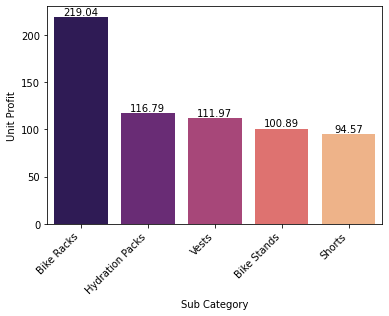

In [49]:
#Mencari top product berdasarkan unit profit
top_Unit_Profit = top_Product.sort_values(by='Unit Profit',ascending=False).head(5)
#Visualisasi top product berdasarkan unit profit
ax = sns.barplot(data=top_Unit_Profit, x='Sub Category', y='Unit Profit', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

5 product yang memiliki keuntungan penjualan tiap produk terbesar adalah bike racks, Hydration Packs, vests,Bike Stands,  shorts. Bike Racks menjadi produk yang memberikan keuntungan penjualan per produk terbesar dan besar keuntungannya cukup signifikan dibanding dengna 4 produk lainnya.

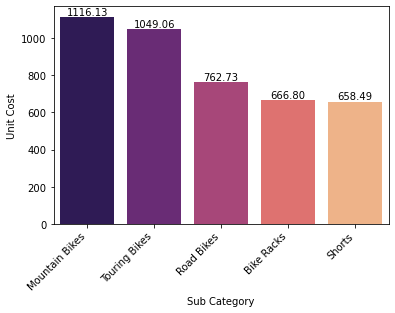

In [50]:
#Mencari top product berdasarkan unit cost
top_Unit_Cost = top_Product.sort_values(by='Unit Cost',ascending=False).head(5)
#Visualisasi top product berdasarkan unit cost
ax = sns.barplot(data=top_Unit_Cost, x='Sub Category', y='Unit Cost', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

5 product yang memiliki biaya produksi terbesar adalah mountain bikes,touring bikes, road bikes, bike racks dan shorts. Dari segi biaya produksi mountain bikes menjadi produk yang memiliki biaya produksi terbesar dan besar biaya produksinya cukup signifikan dibanding dengna 4 produk lainnya.

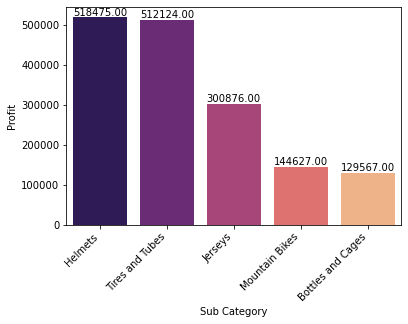

In [51]:
#Mencari top product berdasarkan profit
top_Profit = top_Product.sort_values(by='Profit',ascending=False).head(5)
#Visualisasi top product berdasarkan profit
ax = sns.barplot(data=top_Profit, x='Sub Category', y='Profit', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

5 product yang memberikan jumlah keuntungan penjualan terbesar adalah Helmets, Tires and Tubes, Jerseys, Mountain Bikes, Bottles and Cages. Helmet dan tires and tubes menjadi 2 produk yang memberikan jumlah keuntungan terbesar dengan selisih yang sangat tipis antara keduanya. Sementara jika dibandingkan dengan produk lainnya, 2 produk ini cukup signifikan dari segi jumlah keuntungan yang diberikan. 

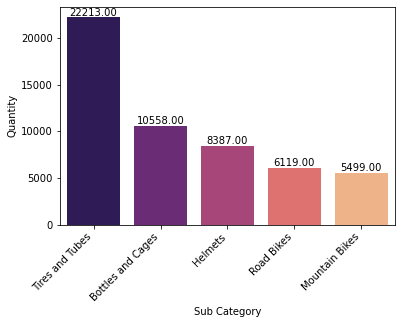

In [52]:
#Mencari top product berdasarkan Quantity
top_Quantity = top_Product.sort_values(by='Quantity',ascending=False).head(5)
#Visualisasi top product berdasarkan Quantity
ax = sns.barplot(data=top_Quantity, x='Sub Category', y='Quantity', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

5 product yang paling sering dibeli oleh customer adalah Tires and Tubes, Bottles and Cages, helmet, Road Bikes dan Mountain Bikes. Jumlah pembelian produk tires and tubes sangat besar dibandingkan 4 produk lainnya. Hal inilah yang membuat tires and tubes memnjadi top 2 profit terbesar. Sementara itu, helmet yang menjadi pemberi profit terbesar, ternyata hanya ada diperingkat ke 3 terbesar dari segi jumlah barang yang dijual. Hal ini dapat terjadi karena keuntungan penjualan per produk yang diberikan oleh helmet cukup besar dibanding produk lainnya.

# Top Gender 

In [53]:
#Membuat pivot table dengan index customer gander
top_gender = pd.pivot_table(df, index=['Customer Gender'],
              aggfunc={
                  'Profit':'sum',
                  'Quantity':'sum'
              }).reset_index()
top_gender

,Customer Gender,Profit,Quantity
0,F,1098350.0,34336.0
1,M,1163252.0,35484.0


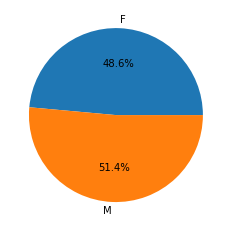

In [54]:
#Visualisasi top gender berdasarkan profit yang dihasilkan
plt.pie(data = top_gender,x='Profit', labels='Customer Gender', autopct='%1.1f%%')
plt.show()

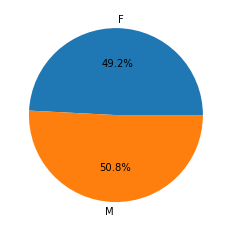

In [55]:
#Visualisasi top gender berdasarkan banyaknya barnag yang dibeli
plt.pie(data = top_gender,x='Quantity', labels='Customer Gender', autopct='%1.1f%%')
plt.show()

Baik dari profit yang dihasilkan maupun jumlah barnag yang dibeli, antara male dan female memiliki selisish yang sangat kecil yaitu sekitar 2%. Hal ini membuktikan bahwa baik male maupun female sama-sama memiliki daya beli yang tinggi. 

# Top Country

In [56]:
#Membuat pivot table dengan index country
top_country = pd.pivot_table(df, index=['Country'],
              aggfunc={
                  'Profit':'sum',
                  'Quantity':'sum',
                  'Unit Price' : 'mean'
              }).reset_index()
top_country

,Country,Profit,Quantity,Unit Price
0,France,272657.0,10373.0,404.809888
1,Germany,958825.0,10386.0,500.015029
2,United Kingdom,328955.0,12822.0,402.691663
3,United States,701165.0,36239.0,348.122428


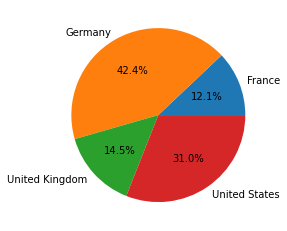

In [57]:
#Visualisasi top country berdasarkan priofit yang dihasilkan
plt.pie(data = top_country,x='Profit', labels='Country', autopct='%1.1f%%')
plt.show()

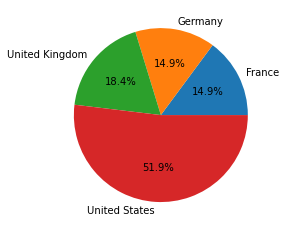

In [58]:
#Visualisasi top country berdasarkan jumlah barang yang dibeli
plt.pie(data = top_country,x='Quantity', labels='Country', autopct='%1.1f%%')
plt.show()

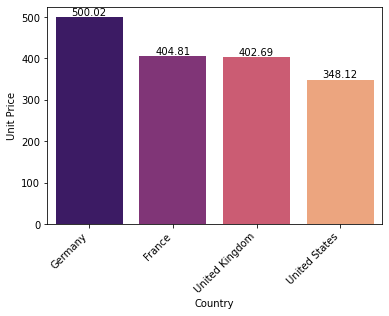

In [59]:
#Mencari top country berdasarkan Unit Price
top_price = top_country.sort_values(by='Unit Price',ascending=False).head(5)
#Visualisasi top product berdasarkan Quantity
ax = sns.barplot(data=top_price, x='Country', y='Unit Price', palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

United States menjadi negara yang paling konsumtif dibanding negara lainnya. Banyaknya data transaksi yang terjadi di United States bahkan melebihi setengah (51.9%) dari jumlah transaksi yang terjadi di keempat negara. Tetapi, jika dilihat dari segi profit, United States hanya menyumbang 31% dari total profit. Berbanding terbalik dengan Germany yang memiliki profit paling besar yaitu sebesar 42.4 % dari total profit tetapi hanya menyumbang 14.9 % dari total jumlah barang yang dibeli.

Jika kita melihat kembali antara negara Germany dan United States pada visualisasi diatas, menjadi masuk akal jika united states memiliki jumlah pembeli yang leih banyak dibandingkan dengan germany. Hal ini dikarenakan harga rata-rata produk di United States jauh lebih murah dibanding di Germany sehingga jumlah pembelinya menjadi lebih banyak. Sementara karena harganya yang rendah membut profit yang dihasilkan oleh United States juga jauh lebih rendah dibanding Germany. 

In [36]:
cs_Germany = df[df['Country']=='Germany']
cs_Germany.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Profit,Profit,Age_Segmentation
376,376,01/29/16,2016.0,January,41.0,M,Germany,Hessen,Accessories,Tires and Tubes,1.0,660.0,1066.0,660.0,1066.0,406.0,406.0,Dewasa
377,377,01/29/16,2016.0,January,41.0,M,Germany,Hessen,Accessories,Tires and Tubes,1.0,37.0,56.0,37.0,56.0,19.0,19.0,Dewasa
378,378,03/19/16,2016.0,March,41.0,M,Germany,Hessen,Bikes,Touring Bikes,1.0,2384.0,2988.0,2384.0,2988.0,604.0,604.0,Dewasa
379,379,03/19/16,2016.0,March,41.0,M,Germany,Hessen,Accessories,Tires and Tubes,2.0,377.0,589.0,754.0,1178.0,212.0,424.0,Dewasa
380,380,03/19/16,2016.0,March,41.0,M,Germany,Hessen,Accessories,Tires and Tubes,2.0,37.5,56.5,75.0,113.0,19.0,38.0,Dewasa


In [72]:
sub_category_counts = df.groupby(['Country', 'Sub Category']).size().reset_index(name='Count')
sub_category_counts = sub_category_counts.sort_values(by=['Country', 'Count'], ascending=[True, False])
top_3_sub_categories = {}
for country in sub_category_counts['Country'].unique():
    top_3_sub_categories[country] = sub_category_counts[sub_category_counts['Country'] == country].head(3)['Sub Category'].tolist()
result_df = pd.DataFrame(top_3_sub_categories).T.reset_index()
result_df = result_df.rename(columns={'index':'Country',0:'Top 1', 1:'Top 2',2:'Top 3'})
result_df

,Country,Top 1,Top 2,Top 3
0,France,Tires and Tubes,Bottles and Cages,Helmets
1,Germany,Tires and Tubes,Bottles and Cages,Helmets
2,United Kingdom,Tires and Tubes,Bottles and Cages,Helmets
3,United States,Tires and Tubes,Bottles and Cages,Helmets


In [73]:
import plotly.express as px

# Filter data untuk mendapatkan 3 negara pertama
top_3_countries = sub_category_counts['Country'].unique()[:4]
filtered_data = sub_category_counts[sub_category_counts['Country'].isin(top_3_countries)]

# Membuat grafik batang interaktif
fig = px.bar(
    filtered_data,
    x='Country',
    y='Count',
    color='Sub Category',
    barmode='group',
    title='Top 3 Sub Categories Purchased by Country'
)

# Menambahkan interaktivitas
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Menampilkan grafik
fig.show()


Top produk yang paling sering dibeli tiap negara memiliki kesamaan yaitu tires and tubes kemudian diikuti bottles and cages dan helmets. 3 produk ini bisa dijadikan acuan untuk produk-produk lainnya baik dari segi marketing maupun diskon yang diberikan sehingga diharapkan produk-produk lainnya akan meningkat jumlah pembeliannya.  

# Segmentasi Umur Csutomer

Untuk mempermudah menganalisis umur customer, diperlukan kolom baru yang mengelompokan kategori umur customer tersebut. Berikut adalah ketentuan pengelompokannya. 
1. age <= 11 : Anak-anak
2. age > 11 dan age <= 25 : Remaja
3. age > 25 dan age <= 45 : Dewasa
4. age > 45 dan age <= 65 : Lansia
5. age > 65 : Manula

In [28]:
#Membuat kolom baru bernama age_segmentation
df['Age_Segmentation'] = df['Customer Age']
#Membuat fungsi bernama map_age_to_category yang berisi aturan pengelompokan
def map_age_to_category(Age_Segmentation):
    if Age_Segmentation <= 11:
        return 'Anak-anak'
    if Age_Segmentation > 11 and Age_Segmentation <= 25 :
        return 'Remaja'
    if Age_Segmentation > 25 and Age_Segmentation <= 45 :
        return 'Dewasa'
    if Age_Segmentation > 45 and Age_Segmentation <= 65 :
        return 'Lansia'
    else:
        return 'Manula'
#Memasukan fungsi ke dalam kolom age_segmentation
df['Age_Segmentation'] = df['Age_Segmentation'].apply(map_age_to_category)
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Unit Profit,Profit,Age_Segmentation
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.000000,29.0,Dewasa
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,4.000000,8.0,Dewasa
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,1.330000,4.0,Dewasa
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,29.000000,58.0,Dewasa
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,6.666667,20.0,Dewasa


In [29]:
#Membuat pivot table dengan index age_segmentation
Age_segment = pd.pivot_table(df, index=['Age_Segmentation'],
              aggfunc={
                  'index':'count',
                  'Profit':'sum',
                  'Quantity':'sum'
              }).reset_index()
Age_segment = Age_segment.rename(columns={'index':'Jumlah'}) 
Age_segment

,Age_Segmentation,Profit,Quantity,Jumlah
0,Dewasa,1435865.0,43144.0,21514
1,Lansia,445886.0,14162.0,7058
2,Manula,17129.0,429.0,218
3,Remaja,362722.0,12085.0,6076


In [30]:
df['Age_Segmentation'].unique()

array(['Dewasa', 'Remaja', 'Lansia', 'Manula'], dtype=object)

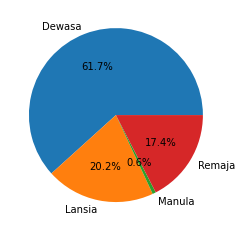

In [31]:
#Visualisasi top age_segmentation berdasarkan jumlah customernya
plt.pie(data = Age_segment,x='Jumlah', labels='Age_Segmentation', autopct='%1.1f%%')
plt.show()

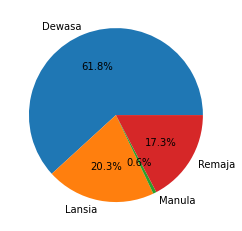

In [32]:
#Visualisasi top age_segmentation berdasarkan jumlah barang yang dibeli
plt.pie(data = Age_segment,x='Quantity', labels='Age_Segmentation', autopct='%1.1f%%')
plt.show()

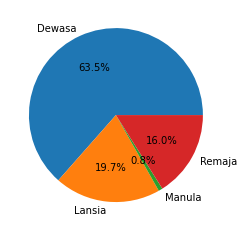

In [33]:
#Visualisasi top age_segmentation berdasarkan profit
plt.pie(data = Age_segment,x='Profit', labels='Age_Segmentation', autopct='%1.1f%%')
plt.show()

Berdasarkan data diatas dapat dilihat bahwa customer yang memiliki daya beli paling tinggi adalah customer dengan kelompok umur Dewasa. Baik dari segi jumlahnya, kemudian quantity maupun profit kelompok umur dewasa merupakan yang tertinggi bahkan besarnya mencapai 60% lebih dari total keseluruhan.

Sementara customer dengan kategori umur Remaja harus sangat diperhatikan. Karena besarnya cukup kecil hanya belasa persen baik dari segi jumlah, quantity maupun profit. Padahal, kategori inilah yang nantinya akan masuk kedalam kategori dewasa. Hal ini tentu bisa menurunkan daya beli kategori dewasa nantinya, sehingga kategori ini pelru mendapatkan perhatian khusus agar daya belinya tidak berkurang atau bahkan bertambah setiap tahunnya. Perhatian khusus yang bisa dilakukan kepada kategori ini bisa seperti pemberian diskon khusus dan menarik untuk kategori Remaja.

In [69]:
#Membuat top 3 barang yang paling sering dibeli oleh tiap age_segmentation
sub_category_counts = df.groupby(['Age_Segmentation', 'Sub Category']).size().reset_index(name='Count')
sub_category_counts = sub_category_counts.sort_values(by=['Age_Segmentation', 'Count'], ascending=[True, False])
top_3_sub_categories = {}
for age_segment in sub_category_counts['Age_Segmentation'].unique():
    top_3_sub_categories[age_segment] = sub_category_counts[sub_category_counts['Age_Segmentation'] == age_segment].head(3)['Sub Category'].tolist()
result_df = pd.DataFrame(top_3_sub_categories).T.reset_index()
result_df = result_df.rename(columns={'index':'Age_Segmentation',0:'Top 1', 1:'Top 2',2:'Top 3'})
result_df


,Age_Segmentation,Top 1,Top 2,Top 3
0,Dewasa,Tires and Tubes,Bottles and Cages,Helmets
1,Lansia,Tires and Tubes,Bottles and Cages,Helmets
2,Manula,Tires and Tubes,Helmets,Bottles and Cages
3,Remaja,Tires and Tubes,Bottles and Cages,Helmets


In [71]:
import plotly.express as px

# Filter data untuk mendapatkan 4 negara
top_3_age = sub_category_counts['Age_Segmentation'].unique()[:4]
filtered_data = sub_category_counts[sub_category_counts['Age_Segmentation'].isin(top_3_age)]

# Membuat grafik batang interaktif
fig = px.bar(
    filtered_data,
    x='Age_Segmentation',
    y='Count',
    color='Sub Category',
    barmode='group',
    title='Top 3 Sub Categories Purchased by Age_Segmentation'
)

# Menambahkan interaktivitas
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Menampilkan grafik
fig.show()


Untuk meningkatkan daya beli customer khususnya kategori remaja bisa dilakukan dengan menawarkan diskon menarik untuk barnag-barang seperti yang ditunjukan tabel top 3 barang yang paling sering dibeli diatas.

Kesimpulan :
1. Produk dari kategori bikes merupakan produk yang sangat menguntungkan. Baik dari segi profit maupun quanitty, produk ini selalu menguasasi top 5.
2. 3 Produk yang harus terus dikembangkan baik dari segi kualitas maupun marketing adalah tires and tubes, bottles and cages, dan helmets. Produk ini merupakan produk yang paling sering dibeli di tiap negara.
3. Kategori umur remaja harus diberikan perlakuan khusus karena jumlahnya yang masih kecil dan customer pada karegori inilah yang nantinya akan masuk kedalam kategori umur Dewasa yang mana merupakan kategori umur customer dengan daya beli paling besar. Jika tidak, ditakutkan daya beli pada kategori dewasa akan menurun seiiring berjalannya waktu karena daya beli penerusnya sangat kecil.

## Link visualisasi looker studio : 
https://lookerstudio.google.com/reporting/90907008-2473-4806-888a-6ebbf1317c92